#Step 1 #Understanding The Data

In [ ]:
import pandas as pd      # Data Manipulation libraries
import numpy as np

import matplotlib.pyplot as plt        #Data Visualization libraries
import seaborn as sns


``
# Data Standardization and Modeling with K-Means and PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set() #this is for styling

In [ ]:
df=pd.read_csv('customer_segmentation.csv')

Briefly Understanding our dataset and preparing data for clustering

In [ ]:
df.head()          #topmost entries in dataset

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [ ]:
df.tail()             #last entries in dataset

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1994,100001995,0,0,45,1,113414,1,0
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [ ]:
df.describe()          #descriptive statistics about the columns

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,1.999000e+03,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000,1999.000000
mean,1.000010e+08,0.457229,0.496748,35.914457,1.038519,120980.701351,0.810905,0.739370
std,5.772059e+02,0.498292,0.500115,11.719793,0.599480,38100.225342,0.638489,0.812568
min,1.000000e+08,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.000000,97704.500000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.000000,115566.000000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.000000,138133.500000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000


In [ ]:
df.shape

(1999, 8)

In [ ]:
df.info()              # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               1999 non-null   int64
 1   Sex              1999 non-null   int64
 2   Marital status   1999 non-null   int64
 3   Age              1999 non-null   int64
 4   Education        1999 non-null   int64
 5   Income           1999 non-null   int64
 6   Occupation       1999 non-null   int64
 7   Settlement size  1999 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


Text(0.5, 1.0, 'Visualization of raw data')

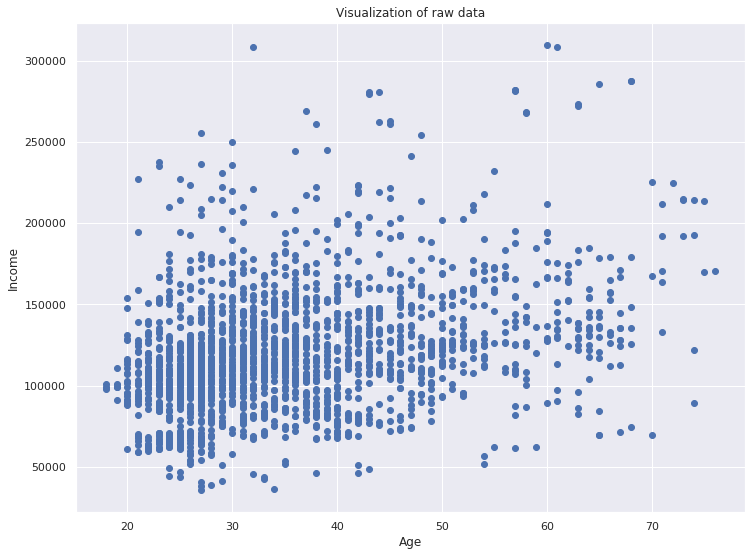

In [ ]:
plt.figure(figsize = (12,9))
plt.scatter(df.iloc[:, 3], df.iloc[:, 5])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data')

correlation between our variables using corr method in the pandas library.

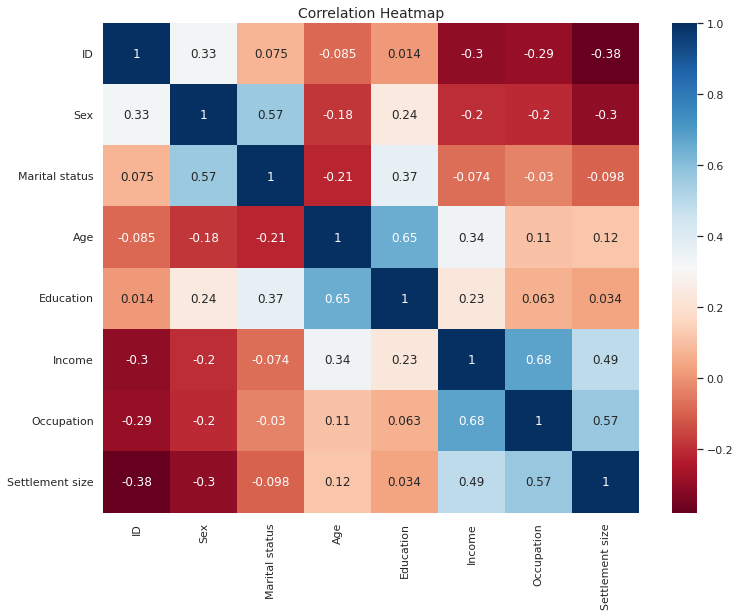

In [ ]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()



*   strong correlation between Education and Age. In other words, older people tend to be more highly educated
*   Income and occupation correlation is 0.68. Means If you have a higher salary, you are more likely to have a higher-level occupation



#Step 2 # Data Preprocessing

In [ ]:
# Standardization
# features have equal weight
scaler = StandardScaler()
X = scaler.fit_transform(df)

X= pd.DataFrame(data = X,columns = df.columns)

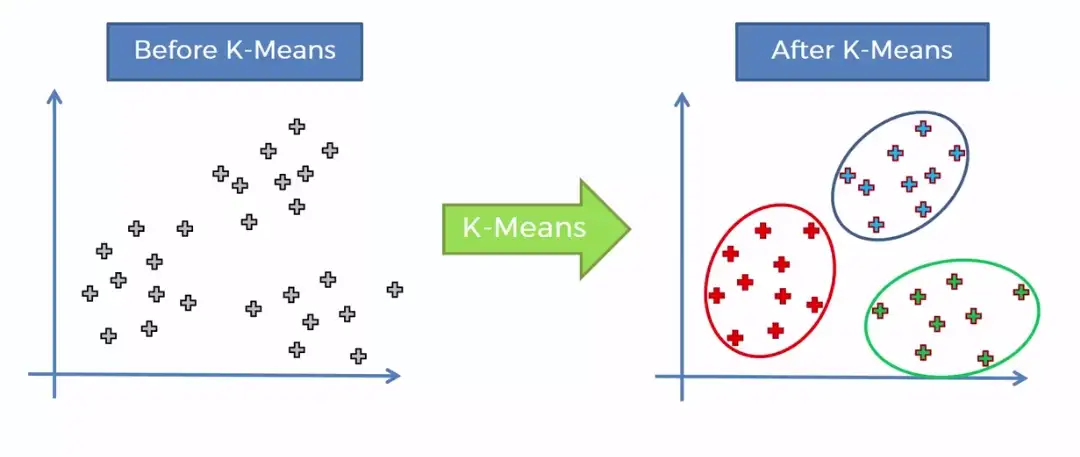

Performing Elbow Method to find Optimal no. of Clusters

when we plot a line chart it resembles an arm

Elbow :point of inflaction on the curve which is a good indication that unlying model fits the curve
that is optimal no. of clusters

In [ ]:
 #  within cluster some of Squares

wcss = []

for i in range(1,11):
    kmean = KMeans(n_clusters=i, init='k-means++', random_state=30)
    kmean.fit(X)
    wcss.append(kmean.inertia_)
wcss

[15991.999999999993,
 12060.826189226762,
 10190.124507782411,
 8803.806718862,
 7868.60873010471,
 7255.513390166088,
 6698.790559475216,
 6236.362763184123,
 5887.53404975032,
 5612.131066544276]

#Step 3 # Training A Model Using Unsupervised Learning Algorithm(K-Means)

In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 30)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=30)

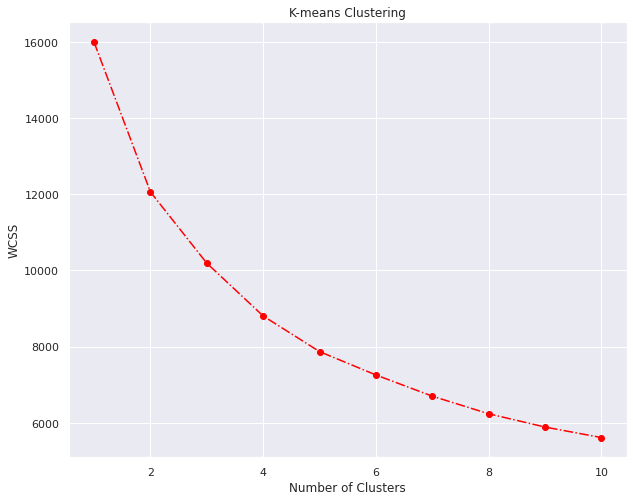

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [ ]:
df_segm_kmeans= X.copy()
df_segm_kmeans = pd.DataFrame(data = X,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_


df_segm_kmeans.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-1.731185,-0.917822,-0.993518,2.653061,1.604259,0.096856,0.296233,1.551804,1
1,-1.729452,1.089536,1.006525,-1.187558,-0.064271,0.782141,0.296233,1.551804,0
2,-1.727719,-0.917822,-0.993518,1.116813,-0.064271,-0.834080,-1.270355,-0.910145,3
3,-1.725986,-0.917822,-0.993518,0.775425,-0.064271,1.327996,0.296233,0.320829,2
4,-1.724253,-0.917822,-0.993518,1.458201,-0.064271,0.736408,0.296233,0.320829,2


In [ ]:
# Calculate mean values for the clusters
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
0,0.227930,0.854253,1.003557,-0.586077,0.049605,-0.405733,-0.287170,-0.396935
1,-0.235837,0.056119,0.369474,1.698438,1.814370,0.927772,0.447090,0.421131
2,-0.597789,-0.857947,-0.623023,-0.032492,-0.499084,0.492770,0.684806,0.790416
3,0.695795,-0.106234,-0.907392,-0.102548,-0.491382,-0.696002,-0.869338,-0.836523


First segment:

It has almost the same number of men and women with an average age of 56. Compared to other clusters, we realize that this is the oldest segment

Second segment:

This segment has the lowest values for the annual salary.
They live almost exclusively in small cities

With low income living in small cities, it seems that this is a segment of people with fewer opportunities.

Third segment:

This is the youngest segment with an average age of 29. They have medium level of education and average income.

They also seem average about every parameter we can label the segment average or standard.

Fourth segment:

It is comprised almost entirely of men, less than 20 percent of whom are in relationships.

Looking at the numbers, we observe relatively low values for education, paired with high values for income and occupation.

The majority of this segment lives in big or middle-sized cities

In [ ]:
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,,
well-off,0.227930,0.854253,1.003557,-0.586077,0.049605,-0.405733,-0.287170,-0.396935
fewer-opportunities,-0.235837,0.056119,0.369474,1.698438,1.814370,0.927772,0.447090,0.421131
standard,-0.597789,-0.857947,-0.623023,-0.032492,-0.499084,0.492770,0.684806,0.790416
career focused,0.695795,-0.106234,-0.907392,-0.102548,-0.491382,-0.696002,-0.869338,-0.836523


In [ ]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off',
                                                                  1:'fewer opportunities',
                                                                  2:'standard',
                                                                  3:'career focused'})




df_segm_kmeans.head()


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-1.731185,-0.917822,-0.993518,2.653061,1.604259,0.096856,0.296233,1.551804,1,fewer opportunities
1,-1.729452,1.089536,1.006525,-1.187558,-0.064271,0.782141,0.296233,1.551804,0,well-off
2,-1.727719,-0.917822,-0.993518,1.116813,-0.064271,-0.834080,-1.270355,-0.910145,3,career focused
3,-1.725986,-0.917822,-0.993518,0.775425,-0.064271,1.327996,0.296233,0.320829,2,standard
4,-1.724253,-0.917822,-0.993518,1.458201,-0.064271,0.736408,0.296233,0.320829,2,standard


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


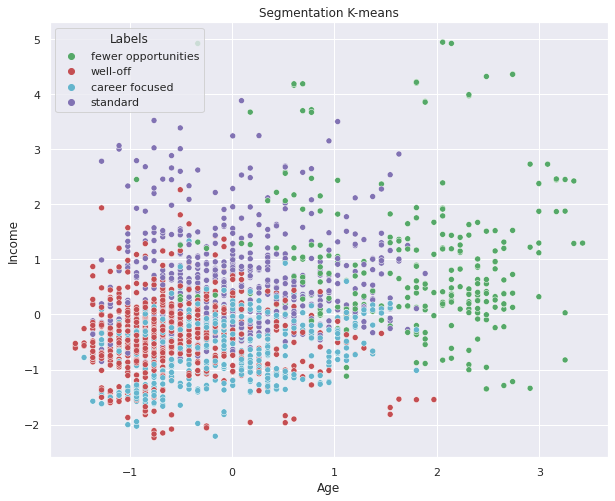

In [ ]:
# We plot the results from the K-means algorithm.
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means')
plt.show()


#PCA


In [ ]:
df_std = scaler.fit_transform(df)
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

# Fit PCA with our standardized data.
pca.fit(df_std)


PCA()

In [ ]:

# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([0.34099377, 0.23163365, 0.1665569 , 0.0996207 , 0.06172424,
       0.04786006, 0.03410089, 0.01750978])

In [ ]:
#80 % of the variance of the data is explained by the first 3 components. Let’s keep the first 3 components for our further analysis
pca = PCA(n_components = 3)

#Fit the model the our data with the selected number of components. In our case three.
pca.fit(df_std)


PCA(n_components=3)

In [ ]:
# Generally, we want to keep around 80 % of the explained variance.

#pca Results
pca.components_


array([[-0.34523967, -0.33007351, -0.1888301 ,  0.26955803,  0.10274917,
         0.48343522,  0.4614226 ,  0.45427402],
       [ 0.10787235,  0.41923712,  0.47032116,  0.35736755,  0.65376118,
         0.17758698,  0.06209719, -0.02988919],
       [ 0.14273689, -0.31875889, -0.48652279,  0.61234635,  0.25075416,
        -0.12450658, -0.34519294, -0.26231424]])

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns,
                           index = ['Component 1', 'Component 2', 'Component 3'])
df_pca_comp

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.345240,-0.330074,-0.188830,0.269558,0.102749,0.483435,0.461423,0.454274
Component 2,0.107872,0.419237,0.470321,0.357368,0.653761,0.177587,0.062097,-0.029889
Component 3,0.142737,-0.318759,-0.486523,0.612346,0.250754,-0.124507,-0.345193,-0.262314


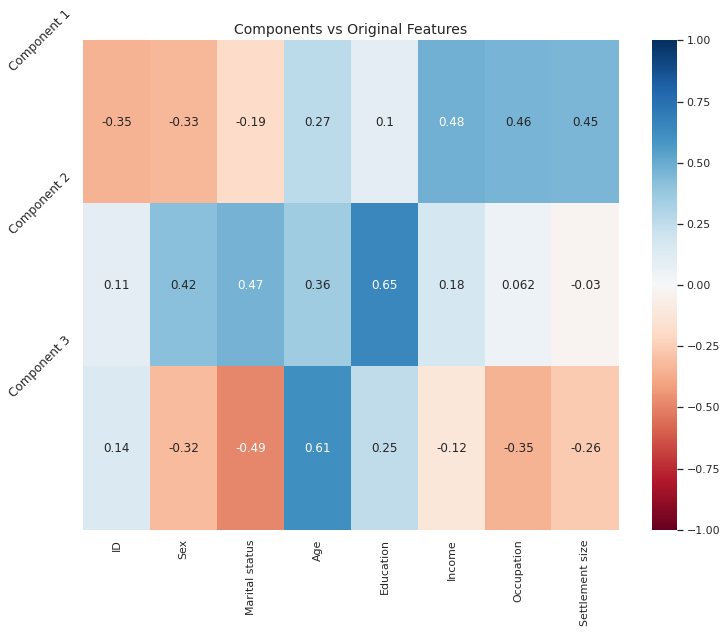

In [ ]:
# Heat Map for Principal Components against original features
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2],
           ['Component 1', 'Component 2', 'Component 3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 14)
plt.show()


In [ ]:
pca.transform(df_std)

array([[ 2.85667481,  0.94732921,  2.03431839],
       [ 0.94041404,  0.38810263, -2.43386601],
       [-0.02137598, -0.88113896,  1.9781941 ],
       ...,
       [-1.67570189,  0.83313454, -0.92532442],
       [-1.83613991, -2.16113156,  1.12173851],
       [-2.71976655,  0.55252688, -0.47619883]])

In [ ]:
scores_pca = pca.transform(df_std)


#K-Means Clustering using PCA

In [ ]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)


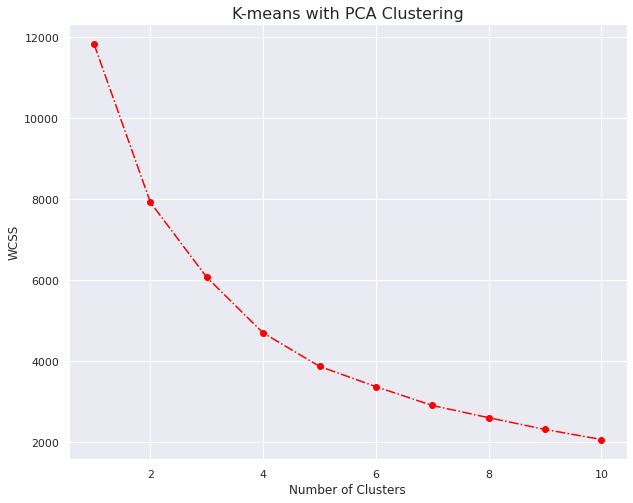

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '-.',color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 16)
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 30)
kmeans_pca.fit(scores_pca)


KMeans(n_clusters=4, random_state=30)

In [ ]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans.head()



,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,100000001,0,0,67,2,124670,1,2,2.856675,0.947329,2.034318,2
1,100000002,1,1,22,1,150773,1,2,0.940414,0.388103,-2.433866,1
2,100000003,0,0,49,1,89210,0,0,-0.021376,-0.881139,1.978194,3
3,100000004,0,0,45,1,171565,1,1,2.213285,-0.558509,0.636523,1
4,100000005,0,0,53,1,149031,1,1,2.110740,-0.419378,1.128523,1


In [ ]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,,
0,1.000012e+08,0.918919,0.968468,28.942943,1.064565,106618.339339,0.659159,0.426426,-1.209861,0.609993,-0.835277
1,1.000007e+08,0.034700,0.192429,35.447950,0.738170,140183.315457,1.253943,1.391167,1.468356,-0.939808,-0.182060
2,1.000009e+08,0.498099,0.692015,55.764259,2.129278,158158.262357,1.125475,1.110266,1.523285,2.180544,0.835683
3,1.000013e+08,0.341743,0.100917,35.268349,0.777523,92570.557339,0.208716,0.045872,-1.205949,-0.880505,1.036551


In [ ]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer opportunities',
                                                          3:'well-off'})
df_segm_pca_kmeans_freq


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,
standard,1.000012e+08,0.918919,0.968468,28.942943,1.064565,106618.339339,0.659159,0.426426,-1.209861,0.609993,-0.835277,666,0.333167
career focused,1.000007e+08,0.034700,0.192429,35.447950,0.738170,140183.315457,1.253943,1.391167,1.468356,-0.939808,-0.182060,634,0.317159
fewer opportunities,1.000009e+08,0.498099,0.692015,55.764259,2.129278,158158.262357,1.125475,1.110266,1.523285,2.180544,0.835683,263,0.131566
well-off,1.000013e+08,0.341743,0.100917,35.268349,0.777523,92570.557339,0.208716,0.045872,-1.205949,-0.880505,1.036551,436,0.218109


In [ ]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',
                                                          1:'career focused',
                                                          2:'fewer opportunities',
                                                          3:'well-off'})

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


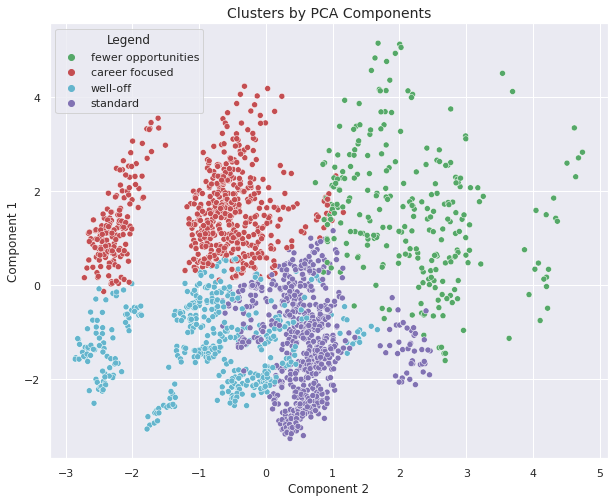

In [ ]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components',fontsize=14)
plt.show()
